# Deep Learning - Hidden Layers

## Why do we stack layers 
(adapted from http://stats.stackexchange.com/questions/63152/what-does-the-hidden-layer-in-a-neural-network-compute)

Let's call the input vector $x$, the hidden layer activations $h$, and the output activation $y$.  You have some function $f$ that maps from $x$ to $h$ and another function $g$ that maps from $h$ to $y$.  

So the hidden layer's activation is $f(x)$ and the output of the network is $g(f(x))$.

**Why have two functions ($f$ and $g$) instead of just one?**

If the level of complexity per function is limited, then $g(f(x))$ can compute things that $f$ and $g$ can't do individually.  

------

**An example with logical functions:**

For example, if we only allow $f$ and $g$ to be simple logical operators like "AND", "OR", and "NAND", then you can't compute other functions like "XOR" with just one of them.  On the other hand, we *could* compute "XOR" if we were willing to layer these functions on top of each other: 

First layer functions:

* Make sure that at least one element is "TRUE" (using OR)
* Make sure that they're not all "TRUE" (using NAND)

Second layer function:

* Make sure that both of the first-layer criteria are satisfied (using AND)

The network's output is just the result of this second function.  The first layer *transforms the inputs* into something that the second layer can use so that the whole network can perform XOR.

----

**An example with images:**

Slide 61 from [this talk](http://cs.nyu.edu/~fergus/tutorials/deep_learning_cvpr12/CVPR2012-Tutorial_lee.pdf) as a single image--shows (one way to visualize) what the different hidden layers in a particular neural network are looking for.

![cnn](nn.png)

The first layer looks for short pieces of edges in the image: these are very easy to find from raw pixel data, but they're not very useful by themselves for telling you if you're looking at a face or a bus or an elephant.

The next layer composes the edges: if the edges from the bottom hidden layer fit together in a certain way, then one of the eye-detectors in the middle of left-most column might turn on.  It would be hard to make a single layer that was so good at finding something so specific from the raw pixels: eye detectors are much easier to build out of edge detectors than out of raw pixels.

The next layer up composes the eye detectors and the nose detectors into faces.  In other words, these will light up when the eye detectors and nose detectors from the previous layer turn on with the right patterns.  These are very good at looking for particular kinds of faces: if one or more of them lights up, then your output layer should report that a face is present.

This is useful because **face detectors are easy to build out of eye detectors and nose detectors, but really hard to build out of pixel intensities.**

So each layer gets you farther and farther from the raw pixels and closer to your ultimate goal (e.g. face detection or bus detection).

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
%matplotlib inline

mnist = input_data.read_data_sets('./', one_hot=True)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [12]:
x, y = mnist.train.next_batch(20)

In [13]:
x.shape

(20, 784)

In [14]:
y.shape

(20, 10)

In [15]:
y

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

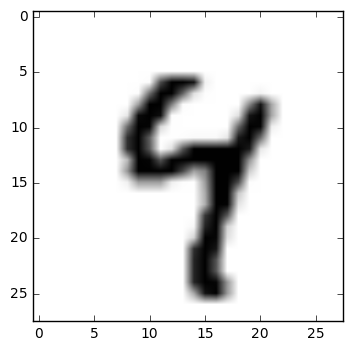

In [24]:
plt.imshow(x[2].reshape((28,28)),cmap='Greys')
plt.show()

In [30]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x,W) + b

y_true = tf.placeholder(tf.float32,[None, 10])

#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# Training
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    l,_ = sess.run([cross_entropy, train_step], feed_dict={x: batch_xs, y_true: batch_ys})
    if i%100 == 0:
        print('loss: '+str(l))

loss: 2.30258
loss: 0.319061
loss: 0.392745
loss: 0.21984
loss: 0.30391
loss: 0.360904
loss: 0.308623
loss: 0.443469
loss: 0.277559
loss: 0.276


In [8]:
# test the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))

0.9177


In [13]:
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# Training
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    l,_,a = sess.run([cross_entropy, train_step, accuracy], feed_dict={x: batch_xs, y_true: batch_ys})
    if i%100 == 0 or (i<100 and i%10==0):
        print(str(i)+': loss: '+str(l)+' accuracy: '+str(a))

0: loss: 2.30258 accuracy: 0.117188
10: loss: 0.815608 accuracy: 0.804688
20: loss: 0.575625 accuracy: 0.859375
30: loss: 0.539753 accuracy: 0.867188
40: loss: 0.558042 accuracy: 0.8125
50: loss: 0.483414 accuracy: 0.875
60: loss: 0.505817 accuracy: 0.875
70: loss: 0.423039 accuracy: 0.90625
80: loss: 0.340016 accuracy: 0.90625
90: loss: 0.383302 accuracy: 0.890625
100: loss: 0.471202 accuracy: 0.859375
200: loss: 0.308909 accuracy: 0.921875
300: loss: 0.33277 accuracy: 0.898438
400: loss: 0.276814 accuracy: 0.914062
500: loss: 0.316544 accuracy: 0.921875
600: loss: 0.314118 accuracy: 0.9375
700: loss: 0.393478 accuracy: 0.875
800: loss: 0.245189 accuracy: 0.914062
900: loss: 0.307896 accuracy: 0.914062


## Hidden Layered Network

In [16]:
def fully_conntected_activation(input,size_in,size_out):
    # Initialise variables
    W = tf.Variable(tf.truncated_normal([size_in, size_out],stddev=0.1))
    b = tf.Variable(tf.truncated_normal([size_out], stddev=0.1))
    # NN part
    activation = tf.sigmoid(tf.matmul(input,W)+b)
    
    return activation

def fully_conntected(input,size_in,size_out):
    # Initialise variables
    W = tf.Variable(tf.truncated_normal([size_in, size_out],stddev=0.1))
    b = tf.Variable(tf.truncated_normal([size_out], stddev=0.1))
    # NN part
    activation = tf.matmul(input,W)+b
    
    return activation

In [41]:
x = tf.placeholder(tf.float32, [None, 784])
y_true = tf.placeholder(tf.float32,[None, 10])

hidden = fully_conntected_activation(x,784,100)
output = fully_conntected(hidden,100,10)
# output = fully_conntected(x,784,10)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=output))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# test the model
correct_prediction = tf.equal(tf.argmax(output,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.InteractiveSession()
tf.initialize_all_variables().run()

# Training
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    l,_,a = sess.run([cross_entropy, train_step, accuracy], 
                     feed_dict={x: batch_xs, y_true: batch_ys})
    if i%100 == 0 or (i<100 and i%10==0):
        print(str(i)+': loss: '+str(l)+' accuracy: '+str(a))

0: loss: 2.30414 accuracy: 0.171875
10: loss: 1.97822 accuracy: 0.476562
20: loss: 1.55055 accuracy: 0.578125
30: loss: 1.2398 accuracy: 0.710938
40: loss: 1.07784 accuracy: 0.789062
50: loss: 0.920444 accuracy: 0.78125
60: loss: 0.842145 accuracy: 0.757812
70: loss: 0.79544 accuracy: 0.78125
80: loss: 0.659229 accuracy: 0.898438
90: loss: 0.632954 accuracy: 0.859375
100: loss: 0.537315 accuracy: 0.867188
200: loss: 0.474113 accuracy: 0.851562
300: loss: 0.385573 accuracy: 0.859375
400: loss: 0.391604 accuracy: 0.859375
500: loss: 0.288136 accuracy: 0.898438
600: loss: 0.201256 accuracy: 0.953125
700: loss: 0.235837 accuracy: 0.914062
800: loss: 0.203214 accuracy: 0.945312
900: loss: 0.257514 accuracy: 0.898438


In [42]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))

0.9343


In [46]:
writer = tf.summary.FileWriter('/tmp/mnist_demo/1')
writer.add_grapg(sess.graph)

AttributeError: module 'tensorflow.python.summary.summary' has no attribute 'FileWriter'

In [45]:
tf.__version__

'0.11.0rc2'